# Plotting and Visualization

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.random import randn

In [2]:
%matplotlib inline
#%matplotlib nbagg

## Figures and Subplots 

<IPython.core.display.Javascript object>


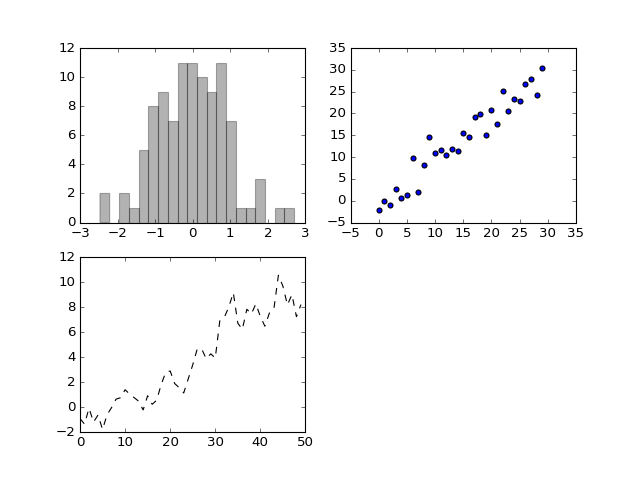

In [17]:
fig = plt.figure() # %matplotlib nbagg 했을때만 가능.

In [18]:
ax1 = fig.add_subplot(2,2,1)  # 2x2 의 첫번째 
ax2 = fig.add_subplot(2,2,2)  # 2x2 의 첫번째 
ax3 = fig.add_subplot(2,2,3)  # 2x2 의 세번째 

In [19]:
plt.plot(np.random.randn(50).cumsum(),'k--')

In [20]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


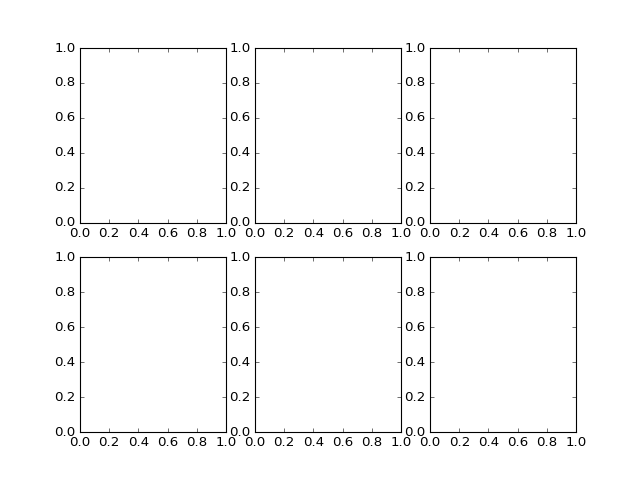

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000287784694E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000287785C3390>]], dtype=object)

In [21]:
fig,axes = plt.subplots(2,3)
axes

## Adjusting the spacing around subplots

In [8]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

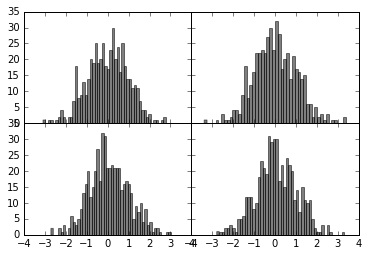

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

## Colors, markers, and line styles

In [10]:
plt.figure()

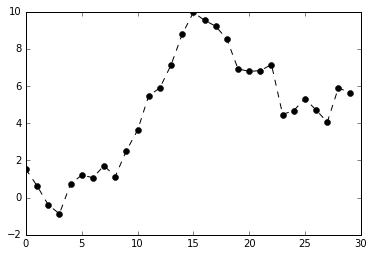

In [11]:
plt.plot(randn(30).cumsum(),'ko--') # color =k, linestyle='dashed, marker='o'

In [12]:
data = randn(30).cumsum()
data

array([ 1.39659148,  1.8860302 ,  1.83274167,  0.5901935 , -0.33956707,
       -0.97802296, -0.93774172, -0.26225952, -0.27120115, -1.15682468,
       -0.09397314, -0.72622056, -1.21782459, -1.7372222 , -1.34617234,
       -0.33367956, -1.37326127, -2.74237394, -1.93482311, -2.54380161,
       -2.45714164, -2.59124366, -4.29435248, -4.80572928, -5.83824611,
       -3.44718862, -4.76253867, -4.18434136, -4.34067241, -6.30796603])

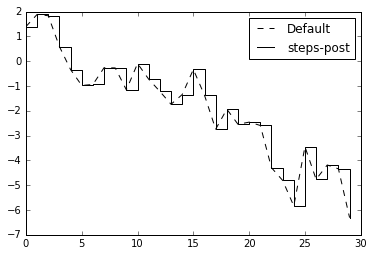

In [13]:
plt.plot(data,'k--',label="Default")
plt.plot(data,'k-',drawstyle='steps-post',label="steps-post")
plt.legend(loc='best')

## Ticks, Labels, and Legends

### Setting the title, axis labels, ticks, and ticklabels

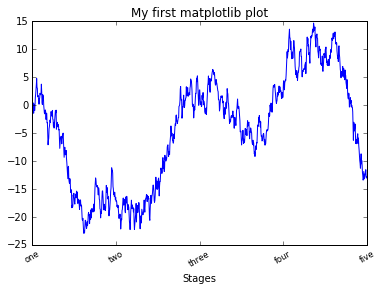

In [14]:
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### Adding Legends 

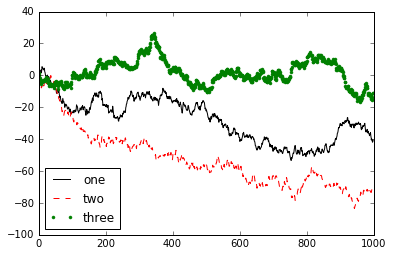

In [15]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'r--', label='two')
ax.plot(randn(1000).cumsum(), 'g.', label='three')

ax.legend(loc='best')

### Annotations and Drawing on a Subplot

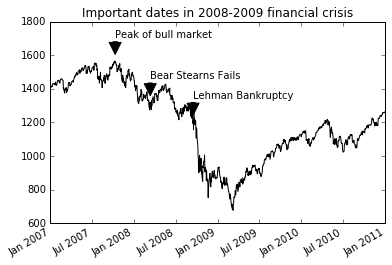

In [31]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax,style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
crisis_data

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

## Plotting Functions in pandas

### Line Plots

In [32]:
from pandas import Series

In [33]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s

0     0.336436
10    2.367634
20    3.628270
30    4.571397
40    4.113612
50    4.245536
60    3.678446
70    6.594486
80    6.770359
90    5.961510
dtype: float64

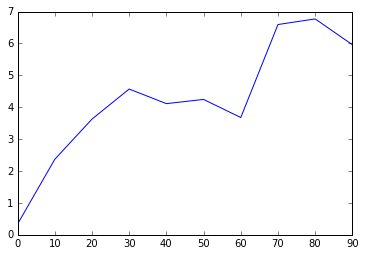

In [34]:
s.plot()

In [39]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.142384,0.660953,0.617779,0.826510
10,0.452801,-0.094397,1.812094,0.935348
20,0.644746,-1.087691,3.407056,2.353829
30,0.632188,-1.413588,4.824893,1.796291
40,0.586268,-2.976866,5.101872,0.669397
50,1.220784,-2.023101,6.152421,1.723667
60,1.420326,-1.687525,6.497861,1.707072
70,1.671287,-0.306728,7.621636,0.491705
80,0.485431,0.662602,8.234163,1.880517
90,0.120368,0.001470,8.647484,1.874322


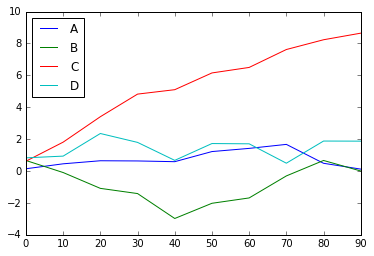

In [40]:
df.plot()

### Barplot

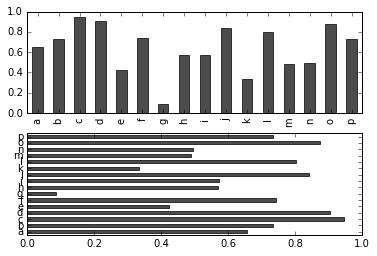

In [41]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [36]:
df = pd.DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.245305,0.695240,0.919805,0.364884
two,0.785110,0.338832,0.075732,0.387223
three,0.101870,0.123454,0.500763,0.697243
four,0.648502,0.315141,0.556975,0.334335
five,0.616087,0.689169,0.293748,0.584778
six,0.229911,0.184274,0.630399,0.725564


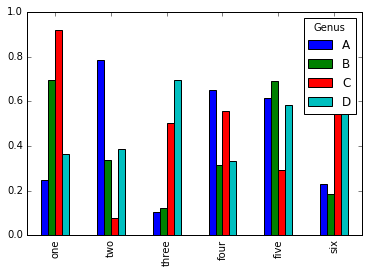

In [37]:
df.plot

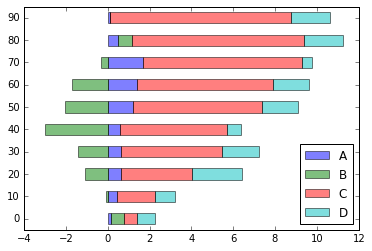

In [42]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [75]:
tips = pd.read_csv('ch08/tips.csv')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [78]:
party_counts = pd.crosstab(tips.day, tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [79]:
party_counts = party_counts.ix[:, 2:5]

In [80]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0) # 총합이 1이 되도록 정규화한다
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


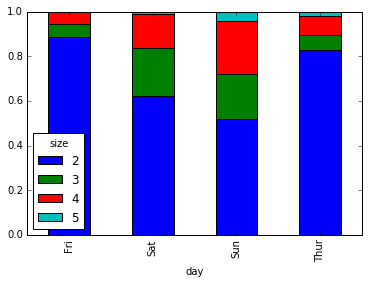

In [81]:
party_pcts.plot(kind='bar',stacked=True)

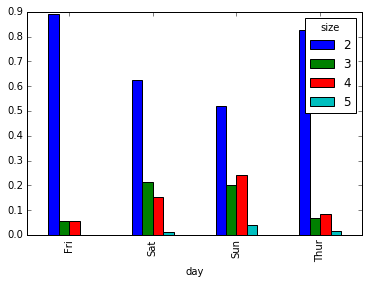

In [82]:
party_pcts.plot(kind='bar')

## Histograms and Density Plots

In [83]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [84]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

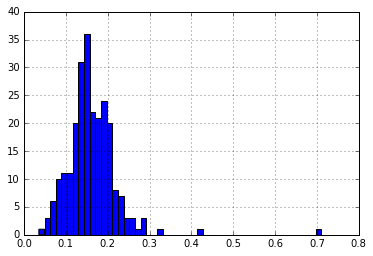

In [85]:
tips['tip_pct'].hist(bins=50)

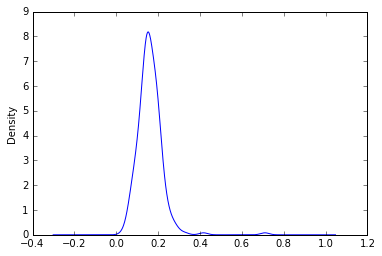

In [86]:
tips['tip_pct'].plot(kind='kde') # Density

In [87]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1) 평균이 0 표준편차 1
comp2 = np.random.normal(10, 2, size=200) # N(10, 4) 평균 10 표준편차 2

In [88]:
values = Series(np.concatenate([comp1, comp2]))
values.head()

0   -1.374343
1   -0.233638
2   -0.891121
3    0.710374
4   -1.374517
dtype: float64

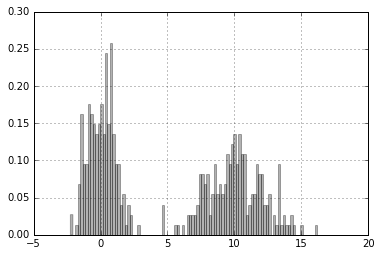

In [89]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)

values.hist 함수 인자
 - bins: 몇 개를 보여줄지
 - alpha: 투명도
 - normed: 정규화: 많은 양의 데이터를 처리함에 있어 여러 이유로 정규화, 즉 데이터의 범위를 일치시키거나 분포를 유사하게 만들어주는 등의 작업은 꼭 필요한 일이다.

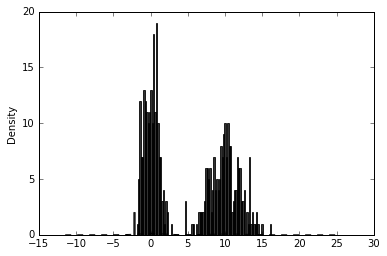

In [92]:
values.hist(bins=100, alpha=0.8, color='k', normed=False)

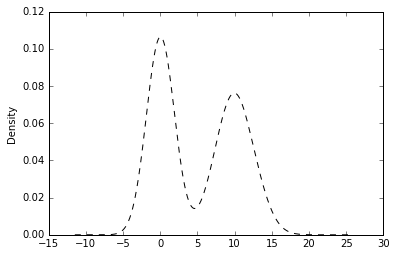

In [93]:
values.plot(kind='kde', style='k--')

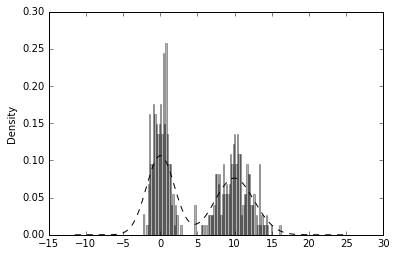

In [95]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter plots

In [94]:
macro = pd.read_csv('ch08/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [96]:
data = macro[['cpi','m1','tbilrate','unemp']]

In [99]:
np.diff?

    diff : ndarray
        The n-th differences. The shape of the output is the same as `a`
        except along `axis` where the dimension is smaller by `n`.
  
      Examples
    --------
    >>> x = np.array([1, 2, 4, 7, 0])
    >>> np.diff(x)
    array([ 1,  2,  3, -7])
    >>> np.diff(x, n=2)
    array([  1,   1, -10])

    >>> x = np.array([[1, 3, 6, 10], [0, 5, 6, 8]])
    >>> np.diff(x)
    array([[2, 3, 4],
           [5, 1, 2]])
    >>> np.diff(x, axis=0)
    array([[-1,  2,  0, -2]])

In [100]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


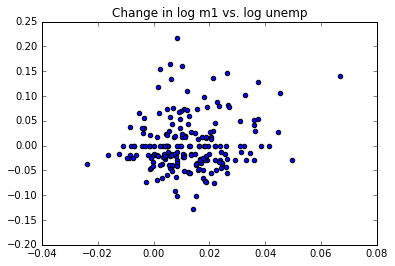

In [102]:
plt.scatter(trans_data['m1'],trans_data['unemp'])
plt.title('Change in log %s vs. log %s' % ('m1', 'unemp'))

### Scatter_matrix (R paris_panels)와 유사 

In [106]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002877F8E0C88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002877FD27CF8>]], dtype=object)

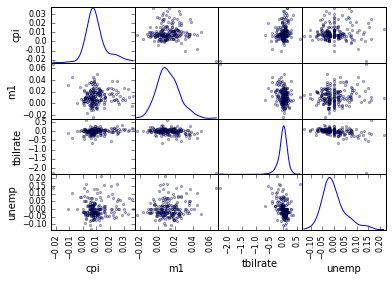

In [108]:
pd.scatter_matrix(trans_data, diagonal='kde', alpha=0.3)

## Plotting Maps : Visualizing Haiti Earthquake Crisis Data

In [3]:
data = pd.read_csv('ch08/Haiti.csv')
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [4]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [5]:
data[data.CATEGORY.isnull()]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
1198,2777,"Food needed in Castro area, near airport 10 De...",24/01/2010 23:31,10 Dessaline Road,hungry grangou. We are in the Cit?? Castro a...,NaN,18.567320,-72.293280,YES,NO
1531,2436,Food Needed in Fontamara 27,22/01/2010 23:04,Fontamara 27 (off Rue National 2) Coordinates ...,NOU NAN FONTAMARA 27 PROLONGE NOU PA WE PES?N\...,NaN,18.532570,-72.367540,YES,NO
1828,2130,"15 People, 5 Babies, Water and Food Needed at ...",23/01/2010 18:07,Airport Runway Entrance - one end of the runwa...,nou sou wout aewopo a antre pis la nou se 15 f...,NaN,18.580320,-72.312390,YES,NO
2620,1182,Trapped person,19/01/2010 05:19,"Delmas, 33 Rue Derrosier Impas Du Crist, Numbe...",Mwen.se MADAM LAINE FRITZ MWEN RETE DELMAS 33 ...,NaN,18.559451,-72.295522,YES,NO
2622,1179,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.431400,-72.787200,YES,NO
2623,1178,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.424764,-72.770300,YES,NO


In [6]:
# 18 < 경도 < 20
# -75 < 위도 < -70
# 모든 조건들이 참이어야 하는 &(and) 연산자 사용
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

- 카테고리별 분석이나 시각화
- 각 카테고리 필드에는 다수의 카테고리가 존재
- 각 카테고리는 코드와 영어, 불어 코드 이름으로 구성
- 그래서 데이터를 좀 더 쉽게 처리할 수 있도록 약간의 수고가 필요
- 먼저 존재하는 모든 카테고리를 뽑아내어 카테고리 코드와 영어 이름으로 분리되도록 함수 작성

In [7]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

In [8]:
def get_all_categories(cat_series):
    # set으로 unique한 값만 받는다.
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    # set.union으로 합집합 만들어서 sorting
    return sorted(set.union(*cat_sets))

In [9]:
def get_english(cat):
    # code와 names 구분자로 . 사용
    code, names = cat.split('.')
    # names에서 |가 있다면 불어와 영어 구분자 이므로
    if '|' in names:
        # |를 기준으로 나눠서 배열의 [1]번째인 영어를 선택한다.
        names = names.split(' | ')[1]
    # 잊지않고 names값은 strip 해주어 공백을 제거한다.
    # 사소한 거지만 문자열 작업할 때는 공백을 제거해 주는게 중요하다.
    return code, names.strip()

In [10]:
# ,: 카테고리 구분자
# .: 코드, 불어 구분자
# |: 불어, 영어 구분자
data['CATEGORY'][:20]

0           1. Urgences | Emergency, 3. Public Health, 
4                             1. Urgences | Emergency, 
5                        5e. Communication lines down, 
6     4. Menaces | Security Threats, 4e. Assainissem...
7                       4. Menaces | Security Threats, 
8     2. Urgences logistiques | Vital Lines, 2f. San...
9     2. Urgences logistiques | Vital Lines, 2d. Ref...
10    1a. Highly vulnerable, 2. Urgences logistiques...
11    4. Menaces | Security Threats, 4e. Assainissem...
12    2. Urgences logistiques | Vital Lines, 2d. Ref...
13    2. Urgences logistiques | Vital Lines, 2b. Pen...
14                                   3. Public Health, 
15              2. Urgences logistiques | Vital Lines, 
16    1. Urgences | Emergency, 7. Secours | Services...
17           3. Public Health, 3b. Chronic care needs, 
18    2. Urgences logistiques | Vital Lines, 2b. Pen...
19    1. Urgences | Emergency, 7. Secours | Services...
20    1. Urgences | Emergency, 2. Urgences logis

In [11]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [12]:
all_cats = get_all_categories(data.CATEGORY)
all_cats[:10]

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern']

In [13]:
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Security Concern',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Earthquake and aftershocks',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distribu

In [14]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [15]:
all_codes = get_code(all_cats)
all_codes[:5]

['1', '1a', '1b', '1c', '1d']

In [16]:
np.unique(all_codes)

array(['1', '1a', '1b', '1c', '1d', '2', '2a', '2b', '2c', '2d', '2e',
       '2f', '3', '3a', '3b', '3c', '3d', '3e', '4', '4a', '4c', '4e', '5',
       '5a', '5b', '5c', '5d', '5e', '6', '6a', '6b', '6c', '7', '7a',
       '7b', '7c', '7d', '7g', '7h', '8', '8a', '8c', '8d', '8e', '8f'], 
      dtype='<U2')

In [17]:
code_index = pd.Index(np.unique(all_codes))

In [18]:
dummy_frame = pd.DataFrame(np.zeros((len(data),len(code_index))), index= data.index, columns=code_index)
dummy_frame.head()

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
for row,cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row,codes] = 1

In [20]:
dummy_frame.tail()

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
3588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3589,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data = data.join(dummy_frame.add_prefix('category_'))
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### basemap

In [ ]:
## pip install GEOS
## 

In [22]:
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt

ImportError: No module named 'mpl_toolkits.basemap'